# Importamos las librearías

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

In [5]:
pathcampo = '../Base de datos con ruido/Campo 100 puntos'
pathtrayec = '../Base de datos con ruido/Trayectorias 200 eval'

# Vemos las gráficas de las bases de datos

## Trayectorias

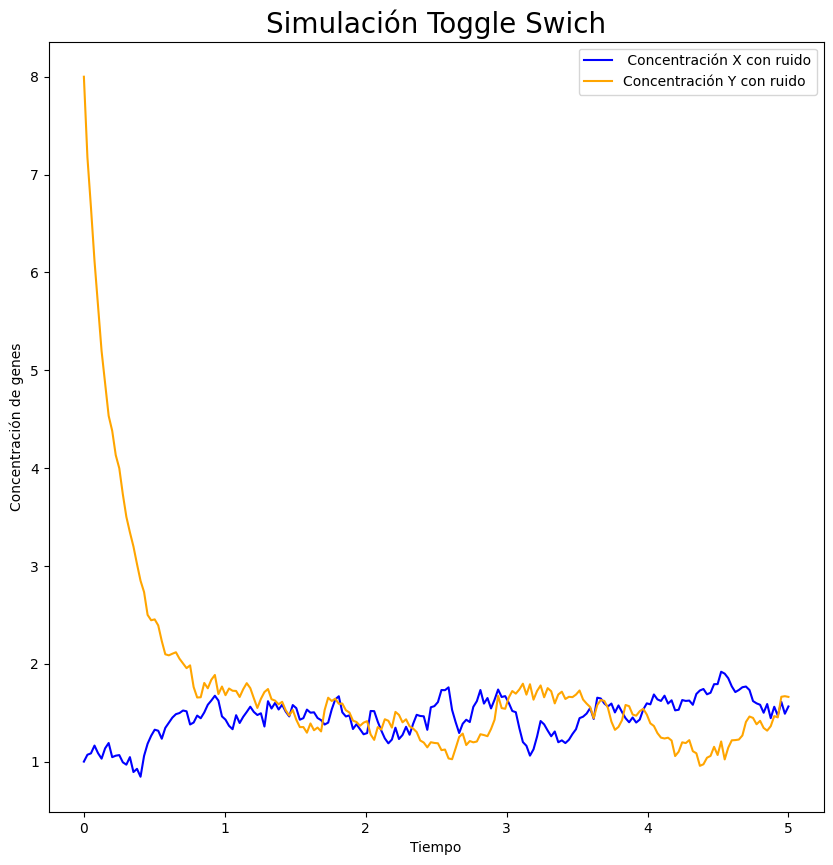

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random

# Declaramos el vector de tiempo
T = 5
t_span = [0,5]
dt = 0.025
N = int(T/dt)
times = np.linspace(0, T, N)

for i in range(1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    # Definimos las condiciones iniciales
    X = np.zeros(N)
    Y = np.zeros(N)
    X[0] = random.randint(0, 10)
    Y[0] = random.randint(0, 10)
    y0 = np.array([X[0], Y[0]])

    # Simulación con ruido
    for i in range(N-1):
        noise1 = np.random.normal(0, .5)
        noise2 = np.random.normal(0, .5)

        X[i+1] = X[i] + (a1/(1+Y[i]**n) - d1*X[i] + b1)*dt + noise1*np.sqrt(dt)
        Y[i+1] = Y[i] + (a2/(1+X[i]**n) - d2*Y[i] + b2)*dt + noise2*np.sqrt(dt)

    # Graficamos
    plt.figure(figsize=(10,10))

    plt.plot(times, X, label=" Concentración X con ruido", alpha=1, color = 'blue')
    plt.plot(times, Y, label="Concentración Y con ruido", alpha=1, color = 'orange')
    plt.xlabel('Tiempo')
    plt.ylabel('Concentración de genes')
    plt.title('Simulación Toggle Swich', fontsize=20)
    plt.legend()
    plt.show()

## Campos vectoriales

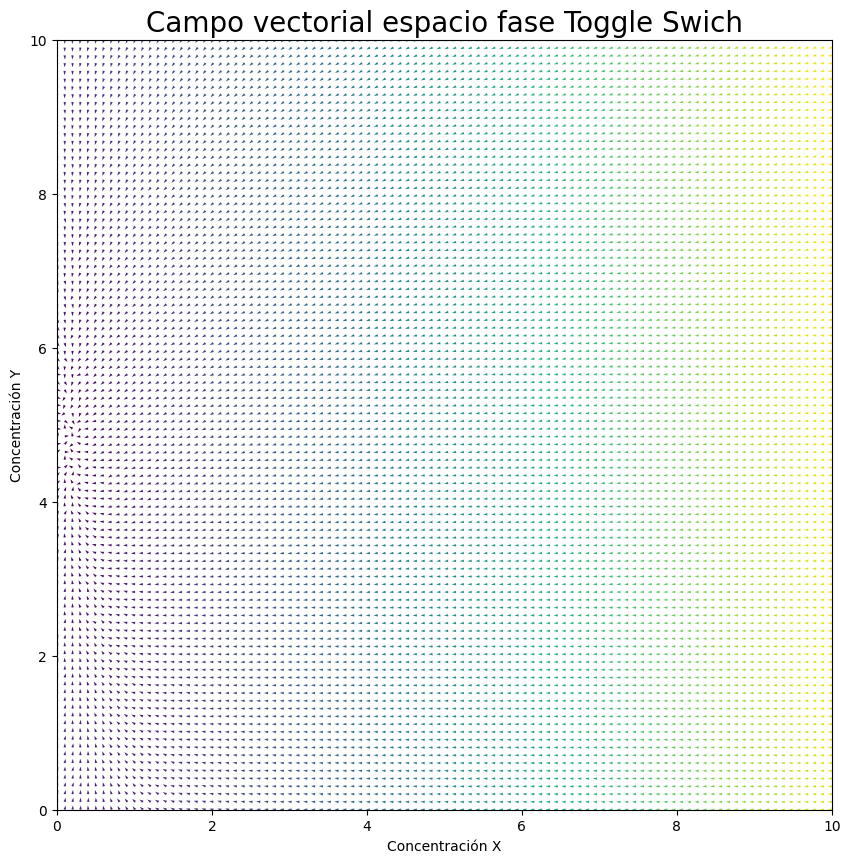

In [93]:
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]

    for i_ci in range(0, 1):
        x_range_neg = 0
        x_range_pos = 10
        y_range_neg = 0
        y_range_pos =10

        y1 = np.linspace(x_range_neg, x_range_pos, 100)
        y2 = np.linspace(y_range_neg, y_range_pos, 100)

        Y1, Y2 = np.meshgrid(y1, y2)

        t1 = 0

        NI, NJ = Y1.shape
        u, v = np.zeros((NI, NJ)), np.zeros((NI, NJ))

        for i in range(NI):
            for j in range(NJ):
                # asignar a cada ODE a un elemento de vector
                X = Y1[i, j]
                Y = Y2[i, j]
                noise1 = np.random.normal(0, .5)
                noise2 = np.random.normal(0, .5)

                # definimos cada ODE
                dX_dt=(a1)/(1+Y**(n))-(d1)*X+b1+noise1
                dY_dt=(a2)/(1+X**(n))-(d2)*Y+b2+noise2

                u[i, j], v[i, j] = dX_dt, dY_dt

        M = (np.hypot(u, v))
        u /= M
        v /= M

        plt.figure(figsize=(10, 10))
        Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
        plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
        plt.xlim([x_range_neg, x_range_pos])
        plt.ylim([y_range_neg, y_range_pos])
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')

# Creamos base de datos de las solcuiones

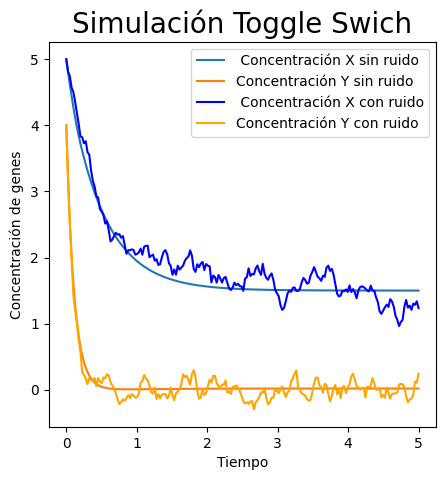

--------------------------------------------
[1, 1, 2, 0, 2, 9, 4]
1
--------------------------------------------
[7, 0, 3, 7, 7, 5, 4]
2
--------------------------------------------
[3, 0, 3, 1, 8, 8, 1]
3
--------------------------------------------
[8, 1, 3, 10, 7, 3, 1]
4
--------------------------------------------
[6, 0, 1, 7, 5, 2, 2]
5
--------------------------------------------
[7, 10, 9, 9, 3, 1, 5]
6
--------------------------------------------
[8, 1, 2, 1, 3, 9, 2]
7
--------------------------------------------
[4, 6, 7, 0, 0, 10, 5]
8
--------------------------------------------
[8, 0, 2, 0, 3, 2, 1]
9
--------------------------------------------
[3, 2, 7, 9, 2, 6, 3]
10
--------------------------------------------
[9, 9, 3, 3, 5, 2, 2]
11
--------------------------------------------
[7, 8, 8, 9, 4, 9, 1]
12
--------------------------------------------
[5, 0, 8, 8, 0, 3, 3]
13
--------------------------------------------
[7, 1, 1, 5, 2, 10, 2]
14
-------------------------

--------------------------------------------
[6, 4, 5, 5, 10, 4, 3]
132
--------------------------------------------
[5, 5, 2, 10, 0, 5, 4]
133
--------------------------------------------
[0, 3, 4, 1, 6, 3, 3]
134
--------------------------------------------
[3, 1, 7, 1, 1, 8, 1]
135
--------------------------------------------
[2, 6, 0, 10, 9, 0, 5]
136
--------------------------------------------
[8, 2, 5, 9, 9, 0, 0]
137
--------------------------------------------
[6, 10, 3, 7, 1, 0, 1]
138
--------------------------------------------
[2, 8, 4, 0, 5, 10, 5]
139
--------------------------------------------
[3, 4, 4, 0, 8, 0, 4]
140
--------------------------------------------
[6, 7, 7, 7, 10, 9, 3]
141
--------------------------------------------
[7, 3, 0, 9, 3, 8, 2]
142
--------------------------------------------
[0, 8, 4, 4, 1, 1, 0]
143
--------------------------------------------
[10, 9, 9, 6, 1, 0, 3]
144
--------------------------------------------
[5, 8, 4, 1, 10, 8, 1]
14

--------------------------------------------
[3, 7, 9, 8, 10, 6, 3]
256
--------------------------------------------
[2, 9, 7, 6, 1, 8, 3]
257
--------------------------------------------
[2, 4, 3, 3, 3, 0, 5]
258
--------------------------------------------
[4, 5, 2, 2, 4, 2, 2]
259
--------------------------------------------
[1, 7, 3, 3, 3, 5, 0]
260
--------------------------------------------
[3, 2, 2, 10, 1, 4, 1]
261
--------------------------------------------
[9, 2, 6, 7, 2, 3, 2]
262
--------------------------------------------
[2, 3, 9, 3, 0, 5, 1]
263
--------------------------------------------
[6, 9, 10, 7, 10, 9, 2]
264
--------------------------------------------
[2, 9, 3, 3, 3, 6, 1]
265
--------------------------------------------
[8, 4, 1, 1, 4, 6, 1]
266
--------------------------------------------
[1, 3, 10, 3, 2, 7, 2]
267
--------------------------------------------
[5, 6, 10, 1, 5, 4, 5]
268
--------------------------------------------
[2, 10, 1, 0, 2, 6, 4]
269

--------------------------------------------
[1, 0, 0, 0, 3, 3, 0]
380
--------------------------------------------
[8, 3, 7, 3, 7, 6, 1]
381
--------------------------------------------
[4, 9, 5, 3, 10, 10, 5]
382
--------------------------------------------
[7, 1, 7, 0, 8, 10, 3]
383
--------------------------------------------
[3, 7, 6, 4, 8, 6, 4]
384
--------------------------------------------
[7, 4, 3, 8, 2, 9, 3]
385
--------------------------------------------
[3, 10, 5, 7, 4, 8, 5]
386
--------------------------------------------
[5, 7, 2, 10, 5, 8, 3]
387
--------------------------------------------
[0, 8, 8, 3, 8, 10, 3]
388
--------------------------------------------
[3, 2, 2, 7, 5, 0, 0]
389
--------------------------------------------
[7, 2, 1, 1, 3, 9, 5]
390
--------------------------------------------
[5, 2, 9, 7, 3, 10, 3]
391
--------------------------------------------
[2, 9, 7, 6, 1, 4, 3]
392
--------------------------------------------
[7, 10, 8, 6, 5, 2, 5]
39

--------------------------------------------
[3, 5, 0, 1, 9, 9, 4]
505
--------------------------------------------
[8, 3, 3, 9, 4, 0, 0]
506
--------------------------------------------
[4, 2, 5, 4, 4, 3, 4]
507
--------------------------------------------
[1, 2, 2, 6, 6, 2, 1]
508
--------------------------------------------
[10, 3, 9, 6, 5, 7, 4]
509
--------------------------------------------
[5, 5, 10, 3, 1, 10, 4]
510
--------------------------------------------
[9, 0, 6, 4, 7, 8, 5]
511
--------------------------------------------
[3, 9, 10, 6, 0, 5, 2]
512
--------------------------------------------
[0, 4, 3, 10, 6, 4, 4]
513
--------------------------------------------
[8, 6, 10, 10, 5, 7, 3]
514
--------------------------------------------
[10, 6, 2, 9, 3, 0, 4]
515
--------------------------------------------
[4, 0, 4, 1, 10, 6, 0]
516
--------------------------------------------
[7, 6, 3, 4, 2, 0, 5]
517
--------------------------------------------
[2, 10, 2, 5, 0, 8, 0]


--------------------------------------------
[5, 2, 5, 9, 6, 9, 5]
630
--------------------------------------------
[2, 0, 8, 1, 4, 0, 2]
631
--------------------------------------------
[1, 3, 0, 10, 10, 9, 3]
632
--------------------------------------------
[1, 1, 4, 5, 4, 5, 4]
633
--------------------------------------------
[4, 6, 8, 7, 9, 7, 3]
634
--------------------------------------------
[3, 0, 0, 2, 7, 10, 3]
635
--------------------------------------------
[8, 9, 6, 4, 1, 0, 3]
636
--------------------------------------------
[1, 2, 6, 2, 4, 8, 3]
637
--------------------------------------------
[9, 3, 7, 4, 4, 1, 0]
638
--------------------------------------------
[0, 4, 1, 0, 4, 0, 1]
639
--------------------------------------------
[6, 2, 3, 10, 4, 6, 0]
640
--------------------------------------------
[9, 4, 9, 3, 5, 5, 1]
641
--------------------------------------------
[3, 10, 3, 0, 7, 7, 2]
642
--------------------------------------------
[2, 2, 7, 3, 0, 4, 1]
643
-

--------------------------------------------
[2, 4, 2, 10, 6, 4, 3]
759
--------------------------------------------
[2, 0, 5, 9, 5, 4, 0]
760
--------------------------------------------
[2, 2, 5, 4, 7, 2, 2]
761
--------------------------------------------
[7, 1, 4, 7, 7, 9, 0]
762
--------------------------------------------
[6, 1, 9, 3, 9, 10, 0]
763
--------------------------------------------
[7, 2, 8, 7, 1, 2, 4]
764
--------------------------------------------
[3, 6, 5, 7, 5, 10, 0]
765
--------------------------------------------
[5, 7, 0, 0, 2, 5, 3]
766
--------------------------------------------
[7, 4, 9, 4, 4, 10, 3]
767
--------------------------------------------
[0, 1, 8, 6, 9, 7, 2]
768
--------------------------------------------
[9, 9, 0, 8, 7, 5, 3]
769
--------------------------------------------
[7, 10, 4, 3, 3, 1, 3]
770
--------------------------------------------
[2, 5, 7, 4, 2, 3, 2]
771
--------------------------------------------
[10, 8, 8, 0, 5, 9, 1]
772


--------------------------------------------
[1, 8, 9, 6, 2, 9, 4]
884
--------------------------------------------
[2, 6, 3, 1, 2, 6, 0]
885
--------------------------------------------
[2, 9, 6, 1, 5, 2, 3]
886
--------------------------------------------
[8, 3, 6, 9, 0, 2, 5]
887
--------------------------------------------
[10, 3, 8, 2, 5, 8, 2]
888
--------------------------------------------
[0, 8, 4, 3, 7, 0, 0]
889
--------------------------------------------
[9, 4, 9, 7, 4, 9, 0]
890
--------------------------------------------
[8, 3, 0, 5, 7, 8, 3]
891
--------------------------------------------
[7, 1, 3, 9, 9, 2, 0]
892
--------------------------------------------
[3, 8, 8, 4, 1, 9, 2]
893
--------------------------------------------
[4, 5, 5, 4, 2, 9, 3]
894
--------------------------------------------
[10, 10, 4, 1, 9, 4, 1]
895
--------------------------------------------
[10, 9, 7, 4, 2, 8, 2]
896
--------------------------------------------
[0, 8, 9, 5, 4, 6, 4]
897
--

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random
import os

# Declaramos el vector de tiempo
T = 5
t_span = [0,5]
dt = 0.025
N = int(T/dt)
times = np.linspace(0, T, N)

varf = []
coef = []
contador = 0

for i in range(1000):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    varfci2 = []
    for i_ci in range(10):
        # Definimos las condiciones iniciales
        X = np.zeros(N)
        Y = np.zeros(N)
        X[0] = random.randint(0, 10)
        Y[0] = random.randint(0, 10)
        y0 = np.array([X[0], Y[0]])

        # Simulación con ruido
        for i in range(N-1):
            noise1 = np.random.normal(0, .5)
            noise2 = np.random.normal(0, .5)

            X[i+1] = X[i] + (a1/(1+Y[i]**n) - d1*X[i] + b1)*dt + noise1*np.sqrt(dt)
            Y[i+1] = Y[i] + (a2/(1+X[i]**n) - d2*Y[i] + b2)*dt + noise2*np.sqrt(dt)

        varfci = np.append([X], [Y], axis=0)
        varfci2.append(varfci)
        
    if contador == 0:
        def f_without_noise(t, state):
            X1, Y1 = state
            dX_dt = a1/(1+Y1**n) - d1*X1 + b1
            dY_dt = a2/(1+X1**n) - d2*Y1 + b2
            return [dX_dt, dY_dt]
        
        # Resolver el sistema de ecuaciones diferenciales sin ruido
        sol_without_noise = solve_ivp(f_without_noise, t_span, y0, t_eval=times)

    
        plt.figure(figsize=(5, 5))
        plt.plot(times, sol_without_noise.y[0], label=" Concentración X sin ruido")
        plt.plot(times, sol_without_noise.y[1], label="Concentración Y sin ruido")
        plt.plot(times, varfci[0], label=" Concentración X con ruido", alpha=1, color = 'blue')
        plt.plot(times, varfci[1], label="Concentración Y con ruido", alpha=1, color = 'orange')
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()        

    varf.append(varfci2)
    print('--------------------------------------------')
    print(coef1)
    contador = contador+1
    print(contador)

varf = np.array(varf)
np.save(os.path.join(pathtrayec, 'varfval'), varf)
coef = np.array(coef)
np.save(os.path.join(pathtrayec, 'coefvarfval'),coef)

# Creamos base de datos espacio vectorial

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

campvec = []
coef = []
contador = 0

for i in range(0, 1000):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    x_range_neg = 0
    x_range_pos = 10
    y_range_neg = 0
    y_range_pos = 10

    y1 = np.linspace(x_range_neg, x_range_pos, 100)
    y2 = np.linspace(y_range_neg, y_range_pos, 100)

    Y1, Y2 = np.meshgrid(y1, y2)

    NI, NJ = Y1.shape
    u, v = np.zeros((NI, NJ)), np.zeros((NI, NJ))

    for i in range(NI):
        for j in range(NJ):
            # asignar a cada ODE a un elemento de vector
            X = Y1[i, j]
            Y = Y2[i, j]
            noise1 = np.random.normal(0, .5)
            noise2 = np.random.normal(0, .5)

            # definimos cada ODE
            dX_dt=(a1)/(1+Y**(n))-(d1)*X+b1+noise1
            dY_dt=(a2)/(1+X**(n))-(d2)*Y+b2+noise2

            u[i, j], v[i, j] = dX_dt, dY_dt

    M = (np.hypot(u, v))
    u /= M
    v /= M

    campvecci = np.append([u], [v], axis=0)
    campvec.append(campvecci)

    print('--------------------------------------------')
    print(coef1)
    contador = contador+1
    print(contador)

campvec = np.array(campvec)
np.save(os.path.join(pathcampo,'campvecval'), campvec)
coef = np.array(coef)
np.save(os.path.join(pathcampo,'coefcampvecval'),coef)

--------------------------------------------
[7, 8, 5, 3, 7, 6, 3]
1
--------------------------------------------
[3, 7, 4, 7, 1, 3, 5]
2
--------------------------------------------
[1, 3, 8, 9, 2, 4, 3]
3
--------------------------------------------
[6, 9, 6, 5, 5, 9, 2]
4
--------------------------------------------
[0, 8, 7, 8, 9, 10, 2]
5
--------------------------------------------
[2, 10, 4, 10, 2, 9, 5]
6
--------------------------------------------
[8, 6, 10, 6, 10, 9, 4]
7
--------------------------------------------
[2, 9, 0, 6, 2, 8, 0]
8
--------------------------------------------
[5, 5, 4, 3, 9, 2, 0]
9
--------------------------------------------
[7, 7, 8, 7, 2, 4, 0]
10
--------------------------------------------
[0, 1, 0, 0, 9, 0, 2]
11
--------------------------------------------
[2, 8, 7, 8, 0, 5, 0]
12
--------------------------------------------
[2, 6, 4, 2, 4, 1, 3]
13
--------------------------------------------
[9, 8, 5, 10, 8, 10, 2]
14
----------------------

--------------------------------------------
[10, 0, 5, 2, 10, 3, 3]
118
--------------------------------------------
[7, 6, 2, 4, 0, 6, 5]
119
--------------------------------------------
[5, 0, 9, 2, 8, 2, 1]
120
--------------------------------------------
[7, 3, 8, 2, 9, 0, 4]
121
--------------------------------------------
[3, 7, 2, 7, 2, 4, 3]
122
--------------------------------------------
[5, 9, 5, 0, 2, 7, 2]
123
--------------------------------------------
[8, 6, 5, 1, 4, 6, 3]
124
--------------------------------------------
[0, 7, 6, 10, 2, 4, 3]
125
--------------------------------------------
[5, 10, 2, 5, 4, 4, 0]
126
--------------------------------------------
[10, 5, 1, 9, 5, 1, 3]
127
--------------------------------------------
[3, 1, 0, 8, 9, 5, 3]
128
--------------------------------------------
[9, 1, 5, 7, 10, 1, 0]
129
--------------------------------------------
[7, 5, 7, 1, 0, 8, 1]
130
--------------------------------------------
[10, 1, 7, 2, 10, 1, 3]
13

--------------------------------------------
[2, 4, 4, 10, 10, 7, 1]
233
--------------------------------------------
[2, 4, 5, 0, 3, 8, 4]
234
--------------------------------------------
[1, 7, 6, 4, 10, 1, 0]
235
--------------------------------------------
[2, 8, 10, 2, 3, 3, 5]
236
--------------------------------------------
[7, 7, 3, 1, 5, 9, 4]
237
--------------------------------------------
[6, 3, 10, 3, 8, 0, 2]
238
--------------------------------------------
[8, 8, 7, 3, 5, 10, 0]
239
--------------------------------------------
[8, 0, 6, 0, 5, 1, 3]
240
--------------------------------------------
[5, 2, 10, 1, 1, 2, 3]
241
--------------------------------------------
[1, 3, 3, 3, 9, 9, 5]
242
--------------------------------------------
[0, 2, 6, 3, 2, 8, 4]
243
--------------------------------------------
[6, 5, 6, 10, 7, 9, 3]
244
--------------------------------------------
[10, 10, 8, 6, 6, 7, 1]
245
--------------------------------------------
[9, 6, 4, 10, 8, 2, 1]

--------------------------------------------
[9, 5, 8, 0, 10, 3, 2]
351
--------------------------------------------
[0, 9, 1, 7, 4, 4, 1]
352
--------------------------------------------
[0, 10, 6, 2, 1, 2, 4]
353
--------------------------------------------
[3, 1, 1, 9, 3, 6, 1]
354
--------------------------------------------
[1, 10, 2, 8, 9, 3, 0]
355
--------------------------------------------
[3, 2, 2, 2, 3, 8, 0]
356
--------------------------------------------
[6, 8, 9, 6, 10, 3, 5]
357
--------------------------------------------
[7, 3, 0, 9, 3, 3, 2]
358
--------------------------------------------
[4, 8, 9, 5, 5, 8, 1]
359
--------------------------------------------
[1, 5, 10, 7, 5, 8, 0]
360
--------------------------------------------
[2, 9, 4, 10, 10, 2, 1]
361
--------------------------------------------
[10, 8, 10, 6, 9, 6, 0]
362
--------------------------------------------
[3, 2, 0, 4, 0, 4, 0]
363
--------------------------------------------
[9, 5, 7, 8, 4, 3, 1]
3

--------------------------------------------
[4, 0, 0, 7, 3, 4, 2]
470
--------------------------------------------
[3, 8, 7, 2, 9, 4, 5]
471
--------------------------------------------
[9, 1, 1, 5, 7, 4, 0]
472
--------------------------------------------
[2, 7, 8, 8, 4, 3, 1]
473
--------------------------------------------
[10, 5, 0, 8, 2, 2, 1]
474
--------------------------------------------
[0, 0, 7, 2, 2, 10, 5]
475
--------------------------------------------
[10, 8, 7, 2, 8, 4, 2]
476
--------------------------------------------
[4, 6, 10, 0, 10, 10, 0]
477
--------------------------------------------
[10, 7, 1, 2, 0, 4, 4]
478
--------------------------------------------
[3, 6, 4, 4, 8, 7, 5]
479
--------------------------------------------
[2, 7, 10, 10, 9, 5, 1]
480
--------------------------------------------
[2, 6, 10, 5, 2, 0, 3]
481
--------------------------------------------
[6, 5, 5, 5, 9, 7, 1]
482
--------------------------------------------
[4, 0, 9, 6, 10, 3, 2]

--------------------------------------------
[7, 6, 6, 6, 9, 5, 5]
588
--------------------------------------------
[3, 1, 3, 0, 10, 3, 0]
589
--------------------------------------------
[4, 9, 0, 5, 0, 1, 4]
590
--------------------------------------------
[3, 3, 2, 6, 8, 10, 4]
591
--------------------------------------------
[5, 7, 0, 4, 7, 8, 0]
592
--------------------------------------------
[10, 6, 4, 2, 2, 9, 4]
593
--------------------------------------------
[6, 6, 5, 4, 3, 2, 2]
594
--------------------------------------------
[7, 2, 3, 10, 2, 3, 1]
595
--------------------------------------------
[10, 5, 3, 2, 3, 4, 0]
596
--------------------------------------------
[4, 3, 1, 8, 6, 0, 0]
597
--------------------------------------------
[10, 6, 10, 6, 0, 1, 2]
598
--------------------------------------------
[10, 8, 6, 6, 8, 6, 1]
599
--------------------------------------------
[1, 3, 2, 9, 7, 2, 4]
600
--------------------------------------------
[9, 2, 10, 7, 6, 2, 0]
6

--------------------------------------------
[2, 8, 7, 0, 8, 1, 3]
703
--------------------------------------------
[6, 0, 2, 8, 2, 6, 2]
704
--------------------------------------------
[0, 3, 4, 3, 6, 6, 2]
705
--------------------------------------------
[8, 0, 9, 4, 9, 6, 0]
706
--------------------------------------------
[3, 5, 2, 0, 4, 6, 2]
707
--------------------------------------------
[0, 1, 7, 7, 8, 8, 2]
708
--------------------------------------------
[6, 4, 7, 3, 9, 9, 5]
709
--------------------------------------------
[9, 5, 4, 7, 8, 8, 3]
710
--------------------------------------------
[9, 4, 7, 10, 6, 0, 3]
711
--------------------------------------------
[6, 7, 9, 8, 4, 9, 4]
712
--------------------------------------------
[0, 8, 5, 8, 9, 1, 1]
713
--------------------------------------------
[5, 8, 7, 8, 1, 10, 0]
714
--------------------------------------------
[1, 4, 10, 5, 9, 7, 0]
715
--------------------------------------------
[5, 10, 1, 0, 8, 8, 0]
716
--

--------------------------------------------
[1, 0, 1, 6, 2, 8, 2]
821
--------------------------------------------
[4, 0, 9, 4, 10, 8, 5]
822
--------------------------------------------
[10, 0, 4, 0, 3, 3, 5]
823
--------------------------------------------
[3, 3, 4, 9, 5, 0, 5]
824
--------------------------------------------
[7, 4, 0, 9, 7, 7, 1]
825
--------------------------------------------
[6, 8, 6, 2, 5, 7, 0]
826
--------------------------------------------
[6, 5, 5, 7, 10, 7, 3]
827
--------------------------------------------
[3, 3, 9, 9, 9, 2, 4]
828
--------------------------------------------
[6, 2, 9, 7, 6, 2, 3]
829
--------------------------------------------
[0, 0, 5, 5, 1, 2, 3]
830
--------------------------------------------
[8, 3, 10, 5, 9, 9, 0]
831
--------------------------------------------
[5, 0, 5, 8, 3, 2, 5]
832
--------------------------------------------
[10, 3, 5, 3, 0, 9, 2]
833
--------------------------------------------
[3, 1, 5, 0, 2, 0, 0]
834
-

--------------------------------------------
[6, 9, 3, 0, 3, 2, 2]
936
--------------------------------------------
[1, 5, 7, 10, 2, 7, 3]
937
--------------------------------------------
[0, 6, 5, 0, 6, 5, 3]
938
--------------------------------------------
[6, 10, 9, 6, 3, 10, 2]
939
--------------------------------------------
[9, 4, 7, 1, 9, 8, 0]
940
--------------------------------------------
[5, 0, 10, 0, 8, 1, 1]
941
--------------------------------------------
[9, 8, 9, 0, 5, 4, 4]
942
--------------------------------------------
[8, 10, 7, 1, 10, 7, 2]
943
--------------------------------------------
[10, 9, 8, 5, 0, 9, 3]
944
--------------------------------------------
[4, 2, 7, 7, 5, 1, 5]
945
--------------------------------------------
[5, 10, 2, 1, 2, 1, 2]
946
--------------------------------------------
[8, 7, 0, 10, 2, 1, 5]
947
--------------------------------------------
[9, 3, 1, 2, 8, 2, 1]
948
--------------------------------------------
[9, 0, 2, 10, 1, 6, 5]


# Comprobamos que los datos se guardaron de manera correcta

## Datos Varf

In [6]:
varf = np.load(pathtrayec + '/varfval.npy')

In [7]:
np.shape(varf)

(1000, 10, 2, 200)

## Coeficientes Varf

In [8]:
coefvarf = np.load(pathtrayec + '/coefvarfval.npy')

In [9]:
np.shape(coefvarf)

(1000, 7)

## Datos Campvec

In [10]:
campvec = np.load(pathcampo + '/campvecval.npy')

In [11]:
np.shape(campvec)

(1000, 2, 100, 100)

## Coeficientes Campvec

In [12]:
coefcampvec = np.load(pathcampo + '/coefcampvecval.npy')

In [13]:
np.shape(coefcampvec)

(1000, 7)

# Volvemos a graficar

## Datos Varf

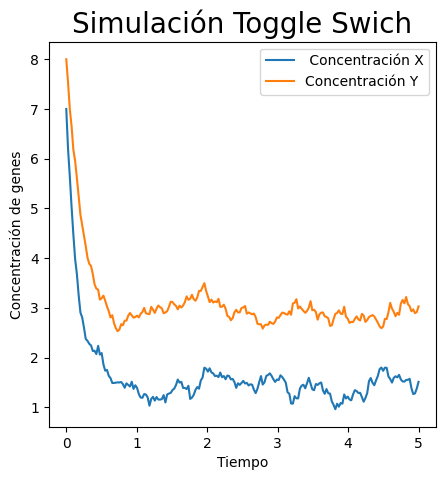

In [15]:
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
plt.figure(figsize=(5,5))
plt.plot(times,np.array(varf)[1,9,0,:], label=" Concentración X")
plt.plot(times,np.array(varf)[1,9,1,:], label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

## Coeficientes Varf

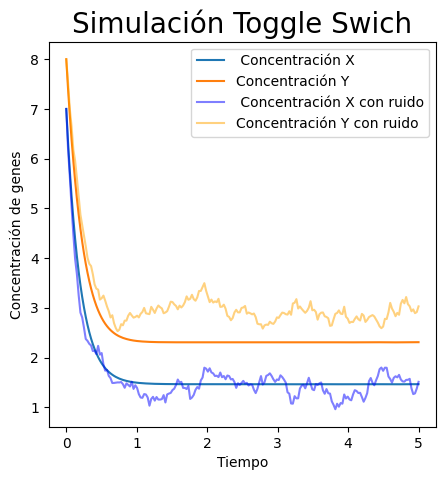

2 7 7 10 5 4 2


In [16]:
for i in range(0, 1):
    # constantes
    a1 = coefvarf[1,0]
    a2 = coefvarf[1,1]
    b1 = coefvarf[1,2]
    b2 = coefvarf[1,3]
    d1 = coefvarf[1,4]
    d2 = coefvarf[1,5]
    n = coefvarf[1,6]


    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 200)

    for i_ci in range(0, 1):
        # Definimos las condiciones iniciales
        y0 = (varf[1,9,0,0],varf[1,9,1,0])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        var1 = sol.y[0]
        var2 = sol.y[1]

        # Graficamos
        plt.figure(figsize=(5, 5))
        plt.plot(times, var1, label=" Concentración X")
        plt.plot(times, var2, label="Concentración Y")
        plt.plot(times,np.array(varf)[1,9,0,:], label=" Concentración X con ruido", alpha = 0.5, color = 'blue')
        plt.plot(times,np.array(varf)[1,9,1,:], label="Concentración Y con ruido", alpha = 0.5, color = 'orange')
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()
print(a1,a2,b1,b2,d1,d2,n)

## Datos Campvec

Text(0, 0.5, 'Concentración Y')

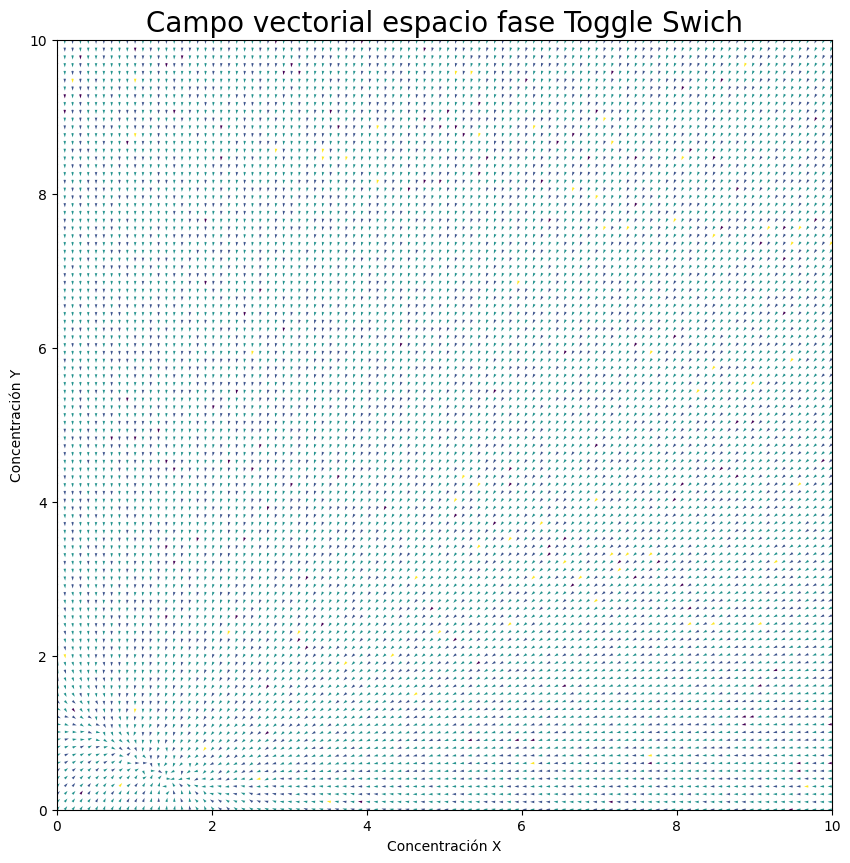

In [40]:
y1 = np.linspace(0, 10, 100)
y2 = np.linspace(0, 10, 100)
Y1, Y2 = np.meshgrid(y1, y2)
t1 = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape        
u,v = np.array(campvec)[0,0,:,:], np.array(campvec)[0,1,:,:]
M = (np.hypot(u,v))
u /= M
v /= M

plt.figure(figsize=(10,10))
Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

## Coeficientes Campvec

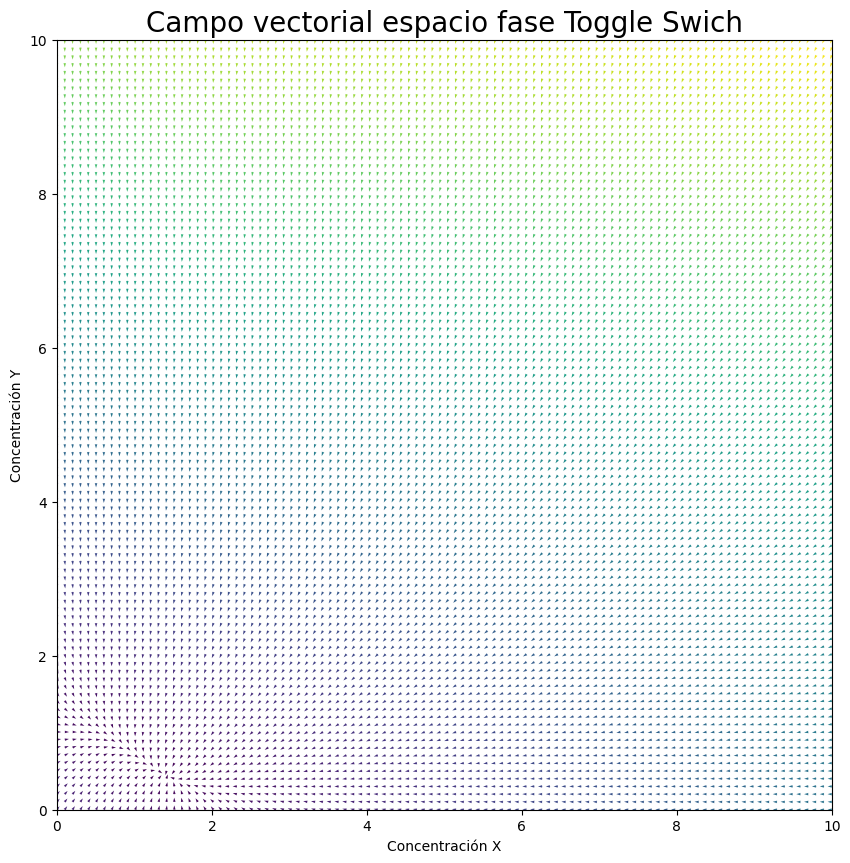

In [41]:
for i in range(0, 1):
    # constantes
    a1 = coefcampvec[0,0]
    a2 = coefcampvec[0,1]
    b1 = coefcampvec[0,2]
    b2 = coefcampvec[0,3]
    d1 = coefcampvec[0,4]
    d2 = coefcampvec[0,5]
    n = coefcampvec[0,6]

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    x_range_neg = 0
    x_range_pos = 10
    y_range_neg = 0
    y_range_pos = 10

    y1 = np.linspace(x_range_neg, x_range_pos, 100)
    y2 = np.linspace(y_range_neg, y_range_pos, 100)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M

    plt.figure(figsize=(10,10))
    Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
    plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.xlabel('Concentración X')
    plt.ylabel('Concentración Y')
